In [10]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # points to image_to_3d root


import torch
import numpy as np
import matplotlib.pyplot as plt

from models.encoder import ImageEncoder
from models.voxel_decoder import VoxelDecoder
from training.losses import voxel_loss


In [11]:
from models.encoder import ImageEncoder
from models.voxel_decoder import VoxelDecoder

encoder = ImageEncoder()
decoder = VoxelDecoder()

print(encoder)
print(decoder)


ImageEncoder(
  (net): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (fc): Linear(in_features=16384, out_features=256, bias=True)
)
VoxelDecoder(
  (fc): Sequential(
    (0): Linear(in_features=256, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=32768, bias=True)
  )
)


In [12]:
import models.encoder
print(dir(models.encoder))


['ImageEncoder', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'nn', 'torch']


In [13]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

encoder = ImageEncoder().to(DEVICE)
decoder = VoxelDecoder().to(DEVICE)

optimizer = torch.optim.Adam(
    list(encoder.parameters()) + list(decoder.parameters()),
    lr=1e-4
)


In [14]:
BATCH = 2
VOX = 32

images = torch.randn(BATCH, 3, 128, 128).to(DEVICE)
voxels = torch.rand(BATCH, 1, VOX, VOX, VOX).to(DEVICE)


In [15]:
for epoch in range(10):
    latent = encoder(images)
    pred_voxels = decoder(latent)

    loss = voxel_loss(pred_voxels, voxels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch} | Loss: {loss.item():.4f}")


Epoch 0 | Loss: 0.6932
Epoch 1 | Loss: 0.6929
Epoch 2 | Loss: 0.6924
Epoch 3 | Loss: 0.6917
Epoch 4 | Loss: 0.6905
Epoch 5 | Loss: 0.6886
Epoch 6 | Loss: 0.6857
Epoch 7 | Loss: 0.6813
Epoch 8 | Loss: 0.6754
Epoch 9 | Loss: 0.6684


In [16]:
def show_voxels(voxel_tensor, threshold=0.5):
    v = voxel_tensor.squeeze().detach().cpu().numpy()
    v = v > threshold

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection="3d")
    ax.voxels(v, edgecolor='k')
    plt.show()


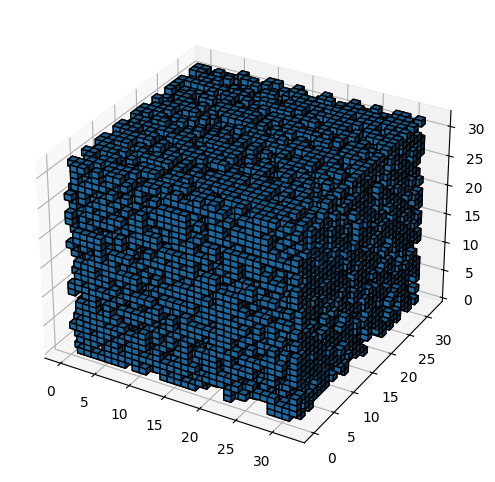

In [17]:
show_voxels(torch.sigmoid(pred_voxels[0]))


In [18]:
torch.save({
    "encoder": encoder.state_dict(),
    "decoder": decoder.state_dict()
}, "voxel_model.pth")


In [5]:
ImportError: cannot import name 'voxel_to_mesh' from 'export.mesh_export'


SyntaxError: invalid syntax (1893926795.py, line 1)

In [1]:
pip install scikit-image trimesh


Note: you may need to restart the kernel to use updated packages.


In [4]:
from export.mesh_export import voxel_to_mesh


ModuleNotFoundError: No module named 'export'

In [6]:
pip install scikit-image trimesh


Note: you may need to restart the kernel to use updated packages.


In [7]:
from export.mesh_export import voxel_to_mesh


ModuleNotFoundError: No module named 'export'

In [19]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # points to image_to_3d root

from export.mesh_export import voxel_to_mesh


In [20]:
pred_voxel = torch.sigmoid(pred_voxels[0])
mesh = voxel_to_mesh(pred_voxel, threshold=0.5, save_path="../voxel_mesh.obj")


Mesh saved to: ../voxel_mesh.obj
